In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,random_state=42)

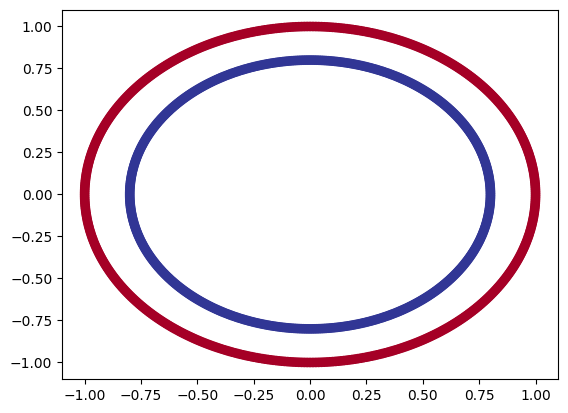

In [3]:
X.shape,y.shape
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [4]:
from torch import nn

In [5]:
class Classification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [6]:
torch.cuda.manual_seed(42)
model=Classification()

In [7]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [9]:
epoch=1000
loss_fn=loss = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)
for i in range(epoch):
  model.train()
  y_pred=model(X_train)
  # print(X_train.size(),y_pred.size(),y_train.size())
  loss=loss_fn(y_pred.squeeze(),y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [10]:
model.eval()
with torch.inference_mode():
  with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

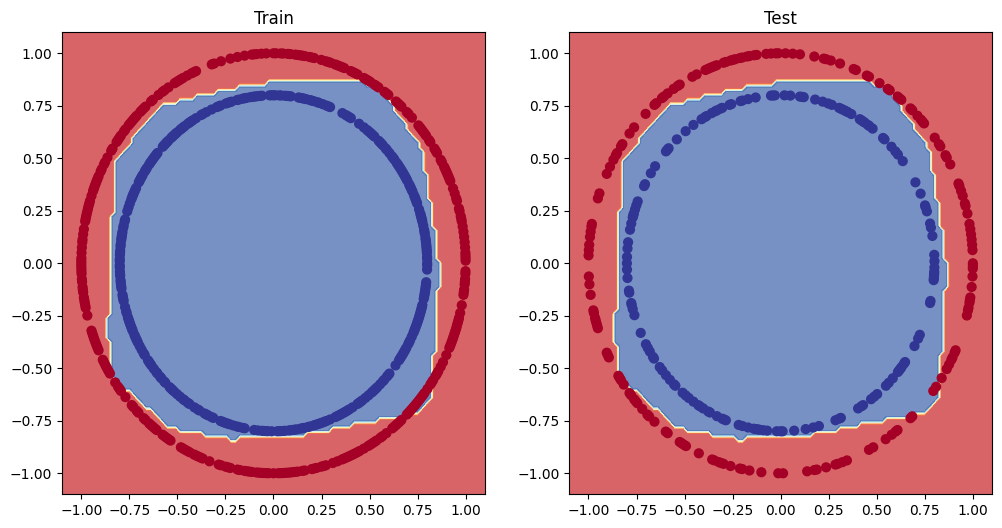

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)